In [1]:
import pandas as pd
from zipfile import ZipFile
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
zf = ZipFile('names.zip')
Data = pd.DataFrame(columns =['Name',"Sex",'Count','Year'])
for file in zf.namelist():
    if file.endswith('.txt'):
        df = pd.read_csv(zf.open(file), names=['Name','Sex','Count','Year'])
        baseyear = int(re.findall("\d+", file)[0])
        df['Year'] = df['Year'].fillna(baseyear)
    Data = pd.concat([Data,df], ignore_index=True)

In [3]:
Data.count()

Name     1989079
Sex      1989079
Count    1989079
Year     1989079
dtype: int64

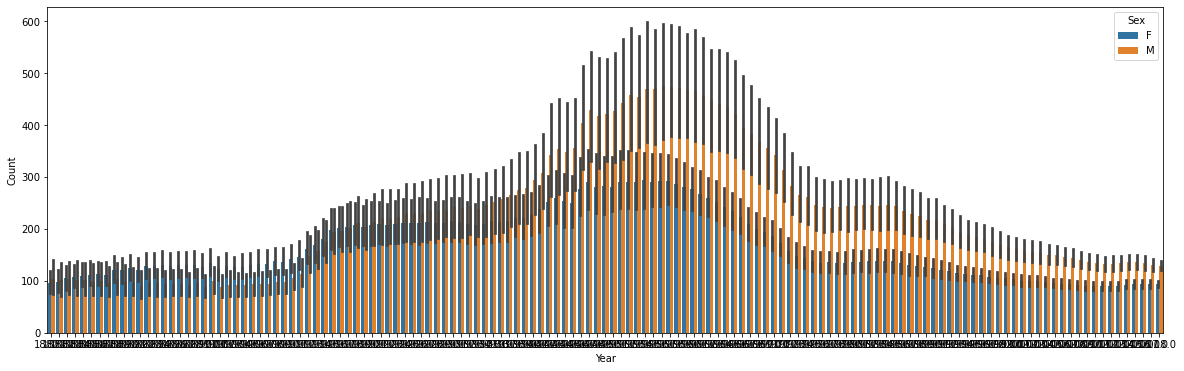

In [4]:
fig=plt.figure(figsize=(20,6))
sns.barplot(x = 'Year',y = 'Count',hue = 'Sex',data = Data)

In [5]:
DescData = Data.sort_values('Count',ascending=False)
GroupedbyNames = DescData.groupby(['Name'])['Count'].sum().sort_values(ascending=False)
PopularNames = GroupedbyNames.index[0:100]